In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Visualising missing values using Heatmap

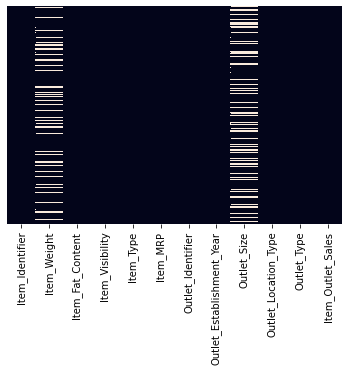

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

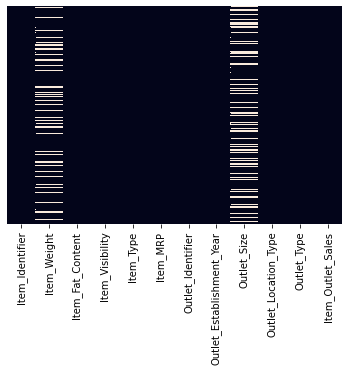

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [ ]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

**Note:** Percentage of missing values is approx. same for both test and train sets in Item Weight and Outlet Size columns

In [ ]:
categ_features=[feature for feature in train.columns if train[feature].dtypes == 'O']
categ_features  

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
num_features=[feature for feature in train.columns if train[feature].dtypes != 'O']
num_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# **Data Cleaning**

In [ ]:
features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]
features_with_na

['Item_Weight', 'Outlet_Size']

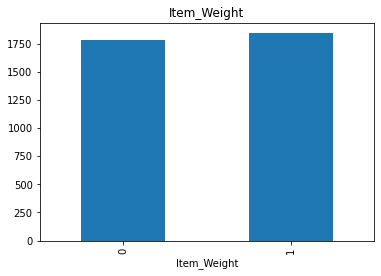

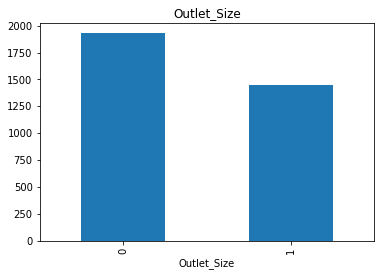

In [ ]:
for feature in features_with_na:
  data=train.copy()
  data[feature]=np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
  plt.title(feature)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


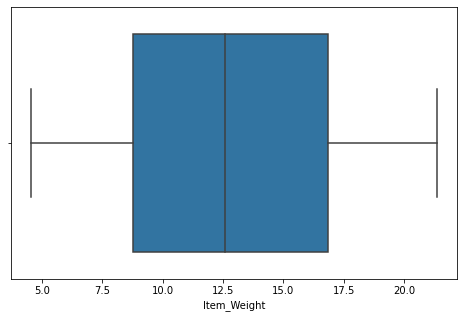

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


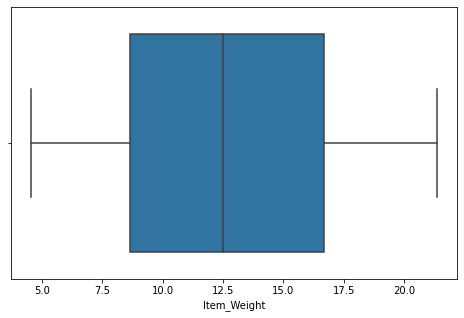

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

In [ ]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
print(train['Outlet_Size'].value_counts())
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [ ]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

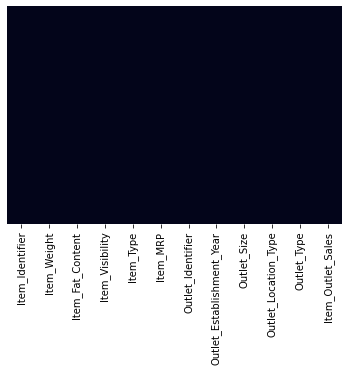

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

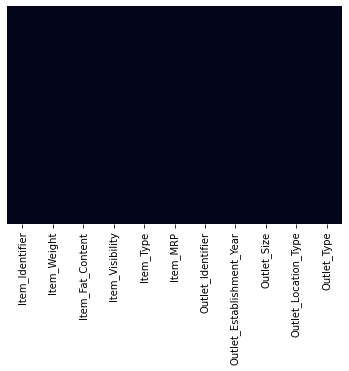

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

We can observe from above heatmaps that the missing values have been imputed

**Exploratory Data Analysis**

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and they need fixing

In [ ]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)
test['Item_Fat_Content']= test['Item_Fat_Content'].astype(str)

In [ ]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36


**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


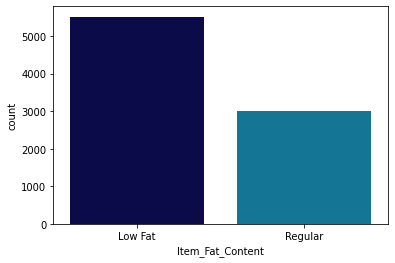

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


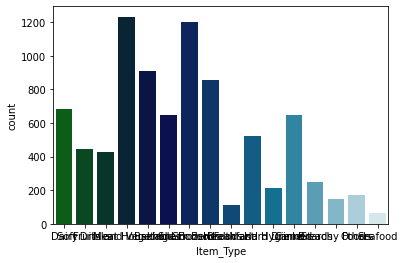

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


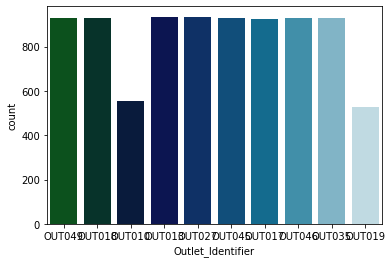

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


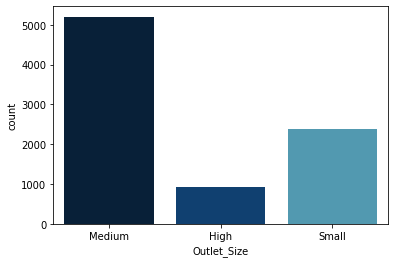

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


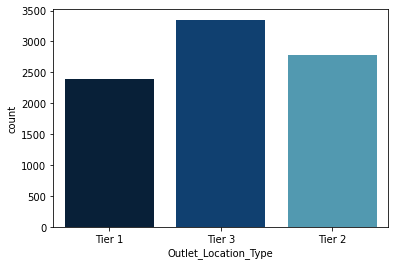

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


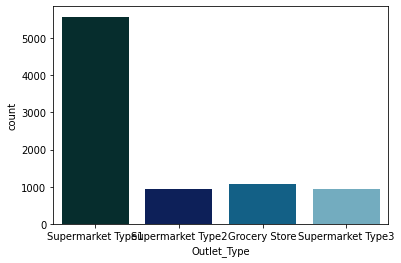

In [ ]:
for feature in categ_features:
  if feature=='Item_Identifier':
    pass
  else:
    sns.countplot(feature,data=train,palette='ocean')
    plt.show()

**Observati0ns from categ variables:**

Item_Fat_Content - Most items sold are low fat.

Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.

Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.

Outlet_Size - Bigmart outlets are mostly medium sized in our data.

Outlet_Location_Type - The most common type is Tier3.

Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.

Checking the distribution of numerical variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


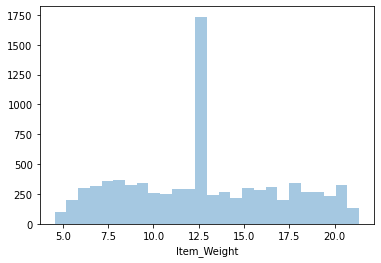

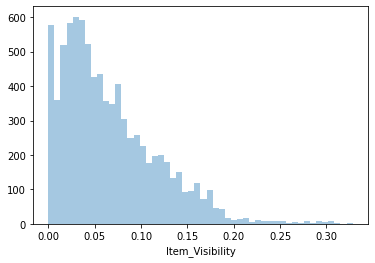

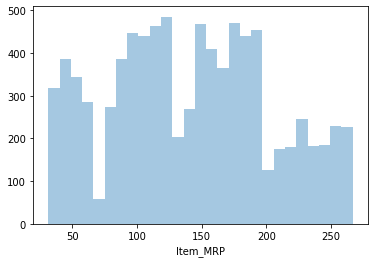

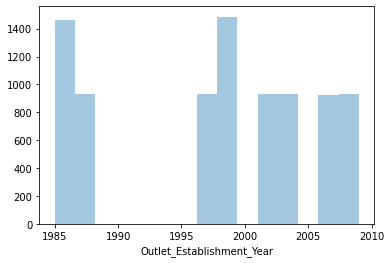

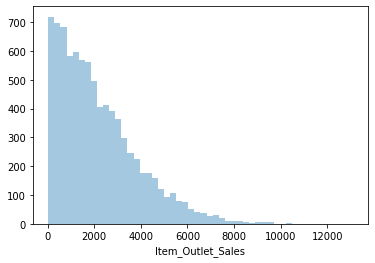

In [ ]:
for feature in num_features:
  sns.distplot(train[feature], kde=False)
  plt.show()

**Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


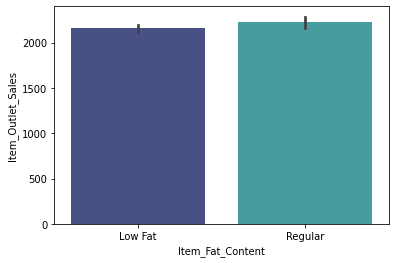

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


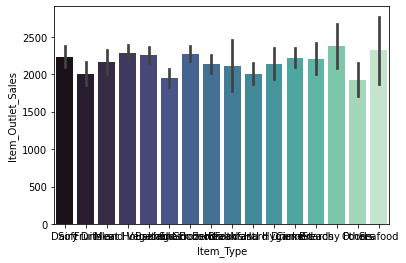

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


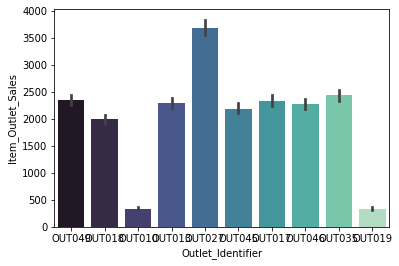

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


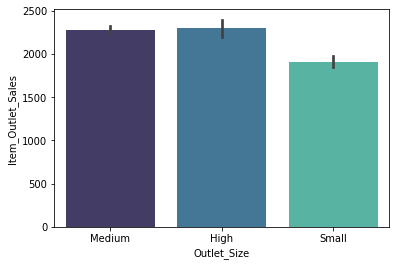

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


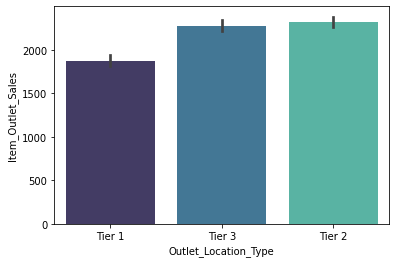

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


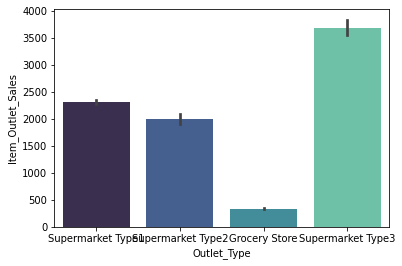

In [ ]:
for feature in categ_features:
  if feature=='Item_Identifier':
    pass
  else:
    sns.barplot(feature,'Item_Outlet_Sales',data=train,palette='mako')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


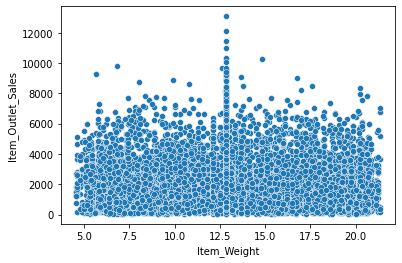

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


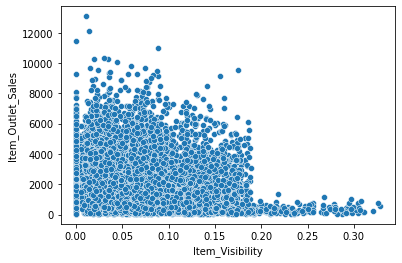

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


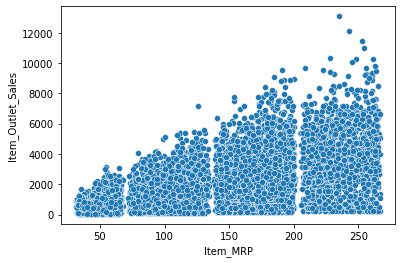

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


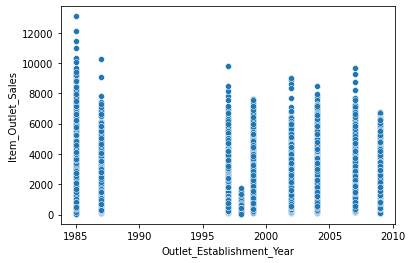

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


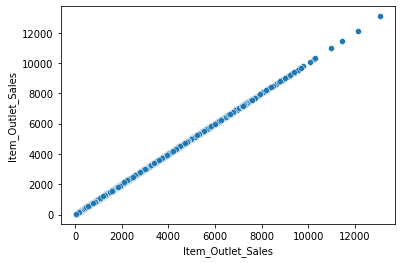

In [ ]:
for feature in num_features:
  sns.scatterplot(train[feature],train['Item_Outlet_Sales'])
  plt.show()

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.Lets consider it like missing information and impute it with mean visibility of that product

In [ ]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

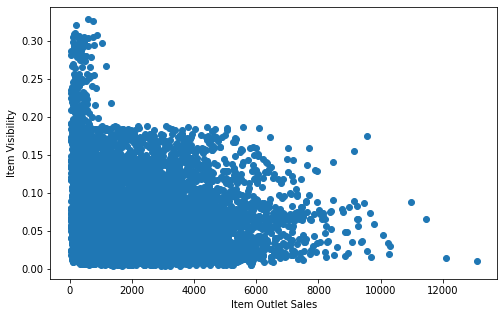

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')



We can see visibility of a product doesn't actually lead to it's sales much.



**Observations from numerical varuables:**

Outlet_Age - The most common outlets are 35 years old.

Item_Weight - The data is very spreaded, no specific pattern.

Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.

Item_MRP - Items with higher MRP tend to sell better in most cases.

**Multivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


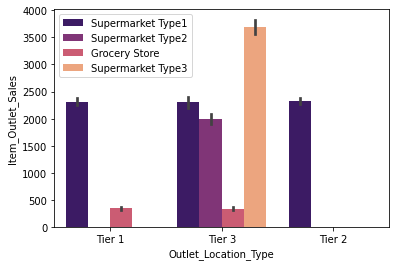

In [ ]:
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


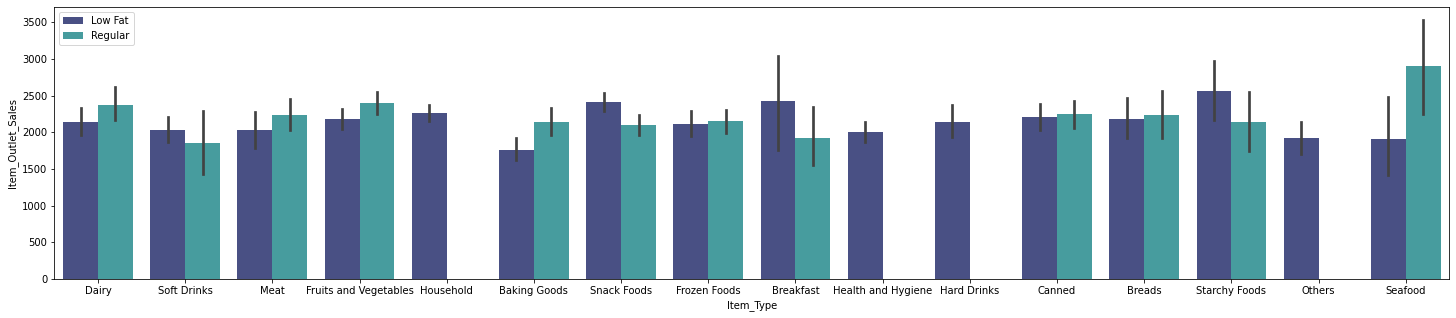

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

**Observations:**

The difference in item types by sales is very small.

Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.

Suprisingly supermarket type 3 is the most profitable and not type 1.

Medium and high outlet sizes are pretty much even in sales.

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

The Tier-3 location type has all types of Outlet type and has high sales margin.

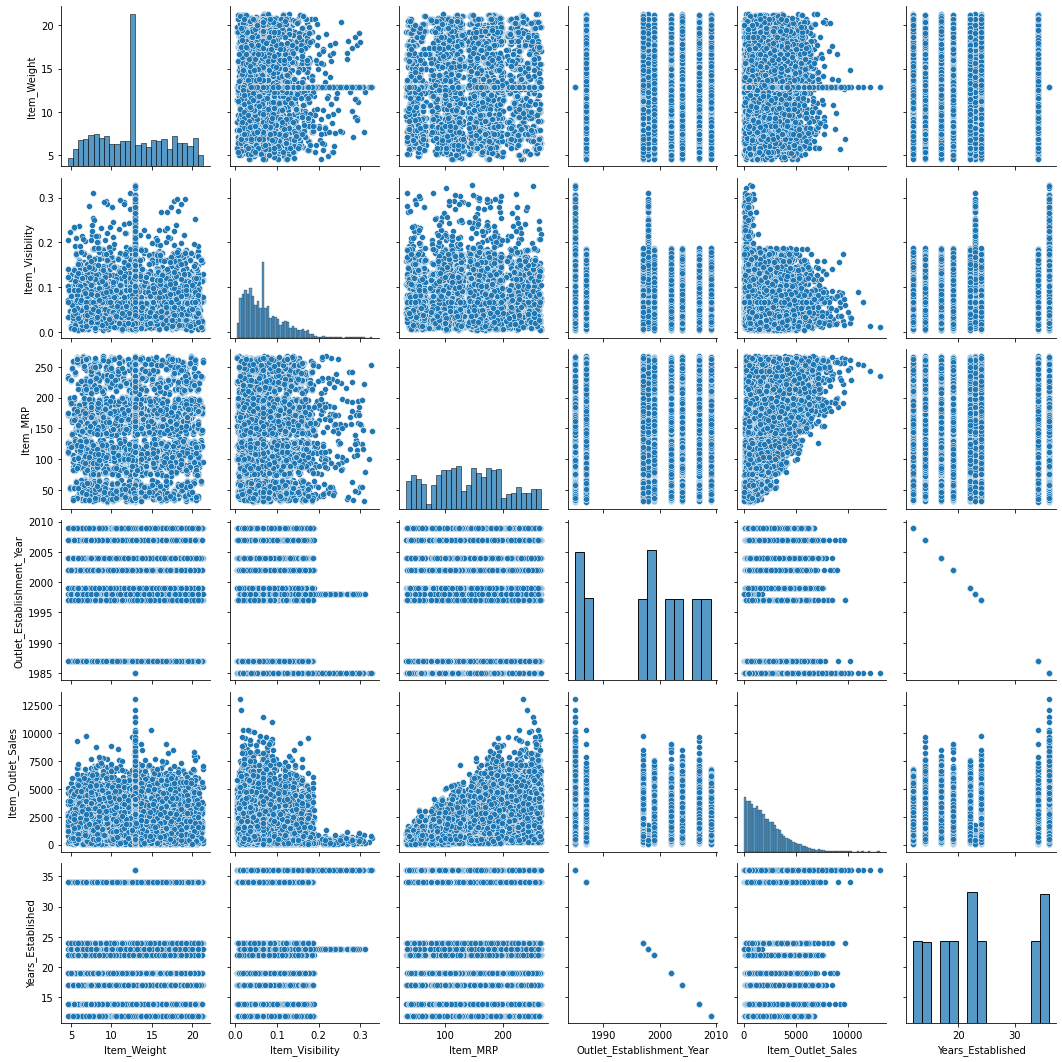

In [ ]:
sns.pairplot(train)

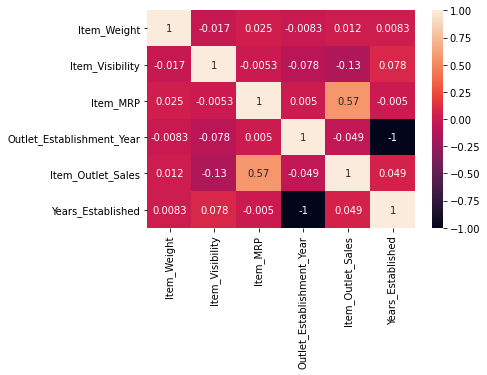

In [ ]:
corr=train.corr()
#plt.figure(figsize=(5,5))
sns.heatmap(train.corr(),annot=True,cmap='rocket')

We can observe that 'Item_Mrp' has a strong correlation with 'Item_outlet_Sales'

In [ ]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,22
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,12
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,22
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,23
4,NCD19,8.93,0,0.066132,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,34


There are some columns that needs to be dropped as they don't seem helping our analysis

In [ ]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [ ]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
ts_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')

#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
ts_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = train.index
ts_oh.index = test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
train = pd.concat([train, tr_oh], axis=1)
test = pd.concat([test, ts_oh], axis=1)

We also need to drop the one hot encoded columns

In [ ]:
train = train.drop(cols,axis=1)
test= test.drop(cols,axis=1)

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_Established,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.066132,182.0950,1,2,732.3800,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.066132,53.8614,0,2,994.7052,34,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
train.shape

(8523, 28)

**Data Transformation**

Log Normalisation to remove skewness

In [ ]:
for column in train.columns:
  train[column] += 1
  train[column] = np.log(train[column])


for column in test.columns:
  test[column] += 1
  test[column] = np.log(test[column])

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_Established,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,2.332144,0.000000,0.015920,5.524692,0.693147,0.000000,8.225808,3.135494,0.0,0.0,0.0,0.0,0.693147,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.693147,0.000000,0.0
1,1.934416,0.693147,0.019095,3.897299,0.693147,1.098612,6.096776,2.564949,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.693147,0.0,0.000000,0.000000,0.693147,0.0
2,2.917771,0.000000,0.016621,4.960170,0.693147,0.000000,7.648868,3.135494,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.0,0.0,0.000000,0.0,0.000000,0.693147,0.000000,0.0
3,3.005683,0.693147,0.064037,5.210005,0.693147,1.098612,6.597664,3.178054,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.693147,0.000000,0.000000,0.0
4,2.295560,0.000000,0.064037,4.004810,0.000000,1.098612,6.903451,3.555348,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.693147,0.000000,0.0


**Feature Selection**

Correlation

In [ ]:
X = train.drop(["Item_Outlet_Sales"],axis=1)
y = train["Item_Outlet_Sales"]

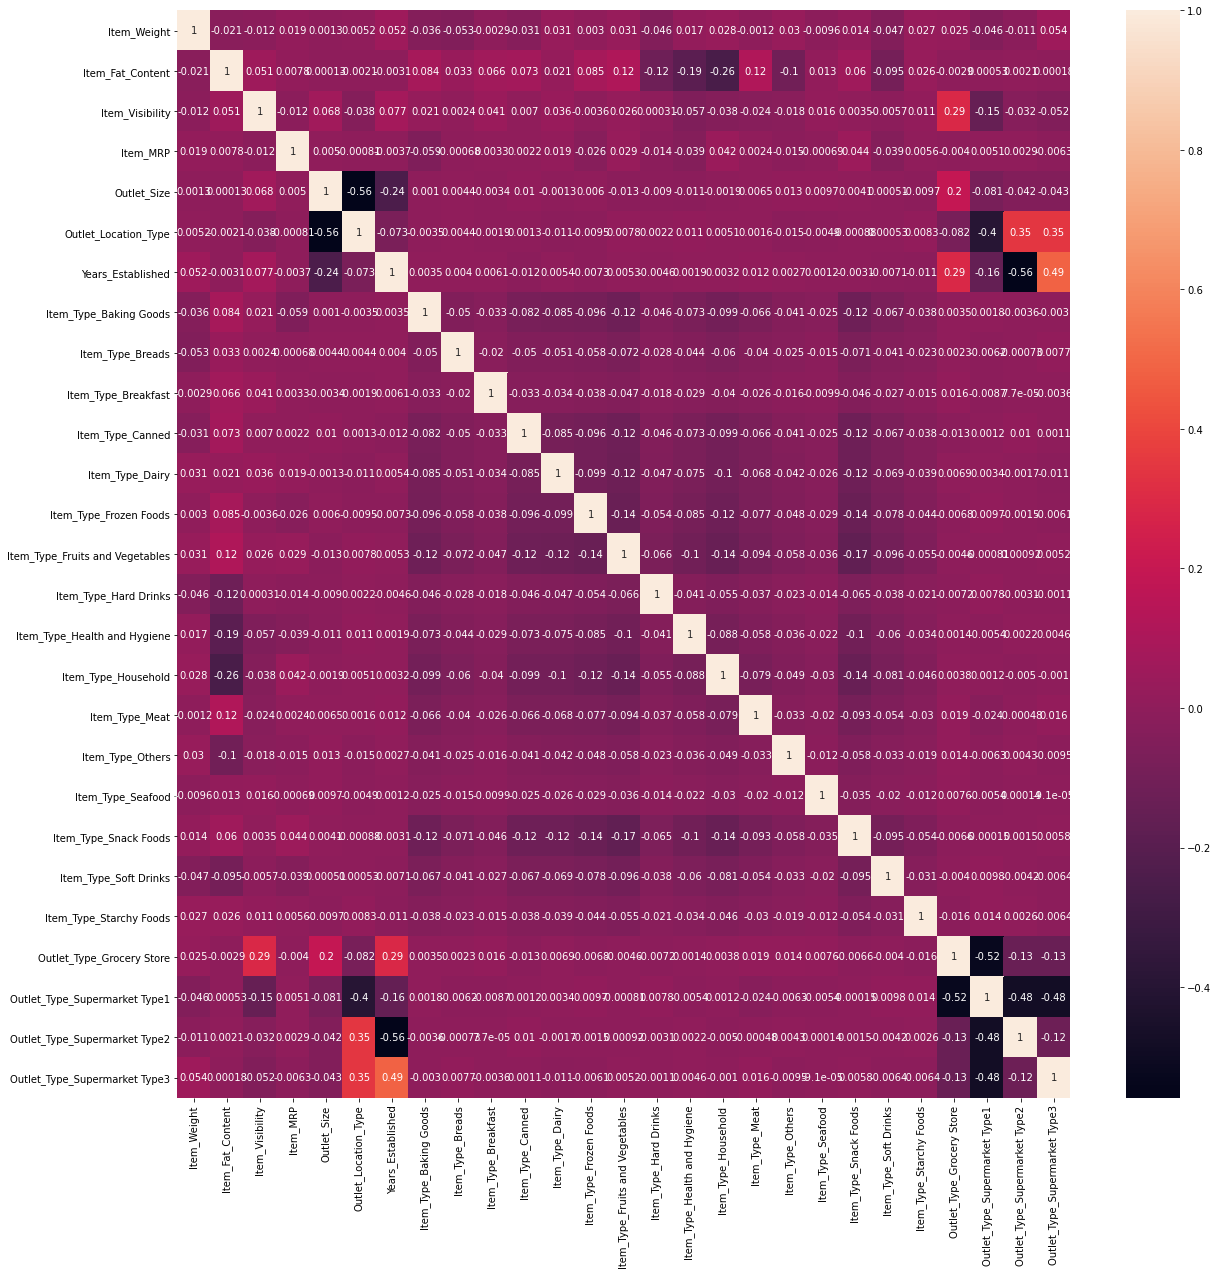

In [ ]:
corr=X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True,cmap='rocket')

In [ ]:
threshold=0.8

# find and remove correlated features
def correlation(X, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(X,threshold)

set()

In [ ]:
X.drop(correlation(X,threshold),axis=1,inplace=True)

In [ ]:
X.shape

(8523, 27)

Standardisation

In [ ]:
scalar = StandardScaler()
X = scalar.fit_transform(X)
X_te = scalar.fit_transform(test)

In [ ]:
X

array([[-0.74870547, -0.73814723, -1.14774673, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.96011848,  1.35474328, -1.0762086 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.03501542, -0.73814723, -1.13194512, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.38667423, -0.73814723, -0.72725097, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.43947265,  1.35474328,  1.54892315, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.55450257, -0.73814723, -0.51726721, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

**Finding the best model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
RandomForestReg = RandomForestRegressor()
linearReg = LinearRegression()

In [ ]:
param_grid_Random_forest_Tree = {
                                "n_estimators": [10,20,30],
                                "max_features": ["auto", "sqrt", "log2"],
                                "min_samples_split": [2,4,8],
                                "bootstrap": [True, False]}

In [ ]:
grid = GridSearchCV(RandomForestReg, param_grid_Random_forest_Tree, verbose=3, cv=5)
# finding the best parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.700, total=   0.3s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.681, total=   0.3s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.703, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.688, total=   0.3s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.628, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20, score=0.704, total=   0.5s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20, score=0.685, total=   0.5s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20, s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
n_estimators = grid.best_params_['n_estimators']
max_features = grid.best_params_['max_features']
min_samples_split = grid.best_params_['min_samples_split']
bootstrap = grid.best_params_['bootstrap']

In [ ]:
RandomForestReg = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features,
                                                         min_samples_split=min_samples_split, bootstrap=bootstrap)

In [ ]:
RandomForestReg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# create best model for XGBoost
prediction_randomForestReg = RandomForestReg.predict(X_test)  # Predictions using the randomForestReg Model
prediction_randomForestReg_error = r2_score(y_test,prediction_randomForestReg)


In [ ]:
prediction_randomForestReg_error

0.7034373857206058

In [ ]:
param_grid_linearReg = {
                'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}

In [ ]:
grid= GridSearchCV(linearReg,param_grid_linearReg, verbose=3,cv=5)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.752, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.742, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.757, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.753, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.700, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.752, total=   0.0s
[CV] copy_X=True, fit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  copy_X=False, fit_intercept=True, normalize=True, score=0.752, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=True ................
[CV]  copy_X=False, fit_intercept=True, normalize=True, score=0.742, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=True ................
[CV]  copy_X=False, fit_intercept=True, normalize=True, score=0.757, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=True ................
[CV]  copy_X=False, fit_intercept=True, normalize=True, score=0.753, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=True ................
[CV]  copy_X=False, fit_intercept=True, normalize=True, score=0.700, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.752, total=   0.0s
[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.742, total

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
fit_intercept = grid.best_params_['fit_intercept']
normalize = grid.best_params_['normalize']
copy_X = grid.best_params_['copy_X']

In [ ]:
linReg = LinearRegression(fit_intercept=fit_intercept,normalize=normalize,copy_X=copy_X)
# training the mew model
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_LinearReg=linReg.predict(X_test)

In [ ]:
linearReg_error = r2_score(y_test,prediction_LinearReg)

In [ ]:
linearReg_error

0.7310992694795797

In [ ]:
r2_score

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:

lasso = Lasso(alpha = 0.05)

lasso.fit(X_train,y_train)

#predict
prediction_lasso = lasso.predict(X_test)


In [ ]:
grid= GridSearchCV(lasso,param_grid_linearReg, verbose=3,cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-0.001, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-0.004, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-0.001, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-0.002, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-0.001, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.742, total=   0.0s
[CV] copy_X=True

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  copy_X=True, fit_intercept=False, normalize=True, score=-50.655, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=-55.423, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, score=-51.973, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, score=-50.252, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, score=-47.331, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, score=-50.655, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, sco

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
lasso_error = r2_score(y_test,prediction_lasso)

In [ ]:
lasso_error

0.7202189262195526